In [ ]:
from zipfile import ZipFile
file_name = "/content/bread_dataset.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import numpy as np 
import tensorflow as tf
import pathlib

file_path = '/content/bread_dataset'

SEED =12345
train_data = tf.keras.utils.image_dataset_from_directory(file_path, validation_split= 0.2, subset='training', seed=SEED, image_size=(180,180), batch_size=4 )
test_data = tf.keras.utils.image_dataset_from_directory(file_path, validation_split= 0.2, subset='validation', seed=SEED, image_size=(180,180), batch_size=4 )


Found 100 files belonging to 2 classes.
Using 80 files for training.
Found 100 files belonging to 2 classes.
Using 20 files for validation.


In [ ]:
class_names = train_data.class_names

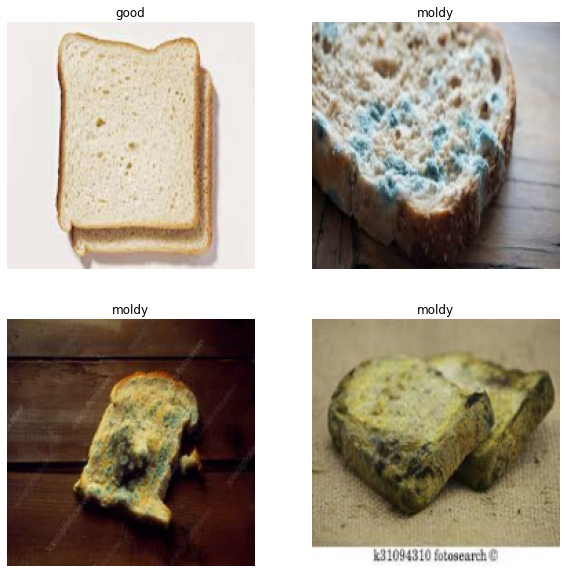

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for images, labels in train_data.take(1):
  for i in range(4):
    ax = plt.subplot(2,2,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [ ]:
# Data normalization

normalization_layer =  tf.keras.layers.Rescaling(1./255)

# Apply in dataset  using dataset.map

train_data_n = train_data.map(lambda x,y: (normalization_layer(x),y))
test_data_n = test_data.map(lambda x,y: (normalization_layer(x),y))

In [ ]:
# Configure dataset
AUTOTUNE = tf.data.AUTOTUNE
train_data_n = train_data_n.cache().prefetch(buffer_size=AUTOTUNE)
test_data_n = test_data_n.cache().prefetch(buffer_size=AUTOTUNE)
# Data preparation completed

In [ ]:
# Build CNN model

input_shape = None
for image_batch, labels_batch in train_data_n:
  input_shape = image_batch.shape[1:]
  print(labels_batch.shape)
  break

nClass = len(class_names)
model =  tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=input_shape))

# Feature extraction layers
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(16,(3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(16,(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))

#classification Layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(nClass,activation='softmax'))

model.summary()

(4,)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 176, 176, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 88, 88, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 86, 86, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 84, 84, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 42, 42, 64)       0         
 2D)                                             

In [ ]:
# Model Training
log_dir="logs/fit/"
tb_callback=tf.keras.callbacks.TensorBoard(log_dir=log_dir)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data_n,validation_data=test_data_n, epochs=5, callbacks=[tb_callback])

Epoch 1/5
20/20 [==============================] - 11s 46ms/step - loss: 0.7004 - accuracy: 0.5625 - val_loss: 0.7614 - val_accuracy: 0.4500
Epoch 2/5
20/20 [==============================] - 1s 38ms/step - loss: 0.7032 - accuracy: 0.4625 - val_loss: 0.6935 - val_accuracy: 0.4500
Epoch 3/5
20/20 [==============================] - 1s 32ms/step - loss: 0.6935 - accuracy: 0.4750 - val_loss: 0.6938 - val_accuracy: 0.4500
Epoch 4/5
20/20 [==============================] - 1s 32ms/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6957 - val_accuracy: 0.4500
Epoch 5/5
20/20 [==============================] - 1s 32ms/step - loss: 0.6939 - accuracy: 0.5125 - val_loss: 0.6954 - val_accuracy: 0.4500
